In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [3]:
!ls ../

bin   data  home   lib64   mnt	 root  sbin  tmp  workspace
boot  dev   lib    libx32  opt	 run   srv   usr
d2l   etc   lib32  media   proc  runs  sys   var


In [4]:
trainset = torchvision.datasets.FashionMNIST('../data',download=True,train=True,transform=transform)

In [5]:
testset = torchvision.datasets.FashionMNIST('../data',download=True,train=False,transform=transform)

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [7]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

In [8]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [9]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img /2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(img, (1,2,0)))

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
net = Net()

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [13]:
from torch.utils.tensorboard import SummaryWriter

In [14]:
writer = SummaryWriter('runs/fashion_minist_experiment_1')

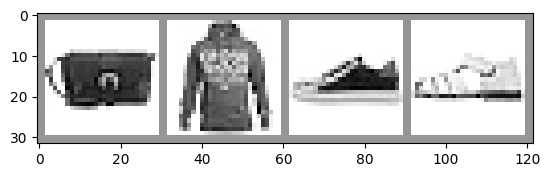

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

writer.add_image('four_fashin_mnist_images', img_grid)

In [16]:
writer.add_graph(net, images)
writer.close()